In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
%matplotlib inline
# Load the data
data = pd.read_csv(r'C:/Users/17708/Desktop/5SGP/New Result2.csv')

# Inspect the data
data.head()

,SGPA1,CGPA1,SGPA2,CGPA2,SGPA3,CGPA3,SGPA4,CGPA4
0,9.50,9.50,8.63,9.02,8.87,8.97,8.24,8.77
1,9.20,9.20,9.29,9.25,9.35,9.28,8.92,9.18
2,8.65,8.65,7.79,8.18,8.39,8.25,8.28,8.26
3,9.75,9.75,9.83,9.80,9.35,9.64,9.68,9.65
4,9.85,9.85,9.71,9.77,10.00,9.85,9.52,9.76


In [3]:
data.tail()

,SGPA1,CGPA1,SGPA2,CGPA2,SGPA3,CGPA3,SGPA4,CGPA4
131,9.60,9.60,9.79,9.70,9.22,9.54,9.04,9.40
132,9.80,9.80,10.00,9.91,9.57,9.79,9.36,9.67
133,7.70,7.70,7.96,7.84,7.52,7.73,7.80,7.75
134,9.25,9.25,9.25,9.25,9.52,9.34,8.72,9.17
135,7.90,7.90,6.79,7.30,7.65,7.42,6.72,7.23


In [4]:
data.shape

(136, 8)

In [5]:
data.size

1088

In [6]:
data.dtypes

SGPA1    float64
CGPA1    float64
SGPA2    float64
CGPA2    float64
SGPA3    float64
CGPA3    float64
SGPA4    float64
CGPA4    float64
dtype: object

In [7]:
data.columns

Index(['SGPA1', 'CGPA1', 'SGPA2', 'CGPA2', 'SGPA3', 'CGPA3', 'SGPA4', 'CGPA4'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SGPA1   136 non-null    float64
 1   CGPA1   136 non-null    float64
 2   SGPA2   136 non-null    float64
 3   CGPA2   136 non-null    float64
 4   SGPA3   135 non-null    float64
 5   CGPA3   135 non-null    float64
 6   SGPA4   136 non-null    float64
 7   CGPA4   136 non-null    float64
dtypes: float64(8)
memory usage: 8.6 KB


In [9]:
data.isnull().sum()

SGPA1    0
CGPA1    0
SGPA2    0
CGPA2    0
SGPA3    1
CGPA3    1
SGPA4    0
CGPA4    0
dtype: int64

In [10]:
data = data.fillna(data.mean())

In [11]:
data.isnull().sum()

SGPA1    0
CGPA1    0
SGPA2    0
CGPA2    0
SGPA3    0
CGPA3    0
SGPA4    0
CGPA4    0
dtype: int64

In [12]:
numerical_features = ["SGPA1", "SGPA2", "SGPA3"]
target = "SGPA4"

In [13]:
data.skew(numeric_only= True)

SGPA1   -3.713583
CGPA1   -3.882117
SGPA2   -3.573464
CGPA2   -4.000144
SGPA3   -3.903019
CGPA3   -4.216565
SGPA4   -4.162953
CGPA4   -4.229119
dtype: float64

In [14]:
data.corr(numeric_only= True)

,SGPA1,CGPA1,SGPA2,CGPA2,SGPA3,CGPA3,SGPA4,CGPA4
SGPA1,1.000000,0.996293,0.941206,0.981904,0.853033,0.941637,0.834929,0.950778
CGPA1,0.996293,1.000000,0.936942,0.982256,0.855623,0.942286,0.821433,0.948021
SGPA2,0.941206,0.936942,1.000000,0.983348,0.884739,0.948266,0.895749,0.977190
CGPA2,0.981904,0.982256,0.983348,1.000000,0.892586,0.968270,0.869234,0.978644
SGPA3,0.853033,0.855623,0.884739,0.892586,1.000000,0.961622,0.871504,0.930888
CGPA3,0.941637,0.942286,0.948266,0.968270,0.961622,1.000000,0.877014,0.968298
SGPA4,0.834929,0.821433,0.895749,0.869234,0.871504,0.877014,1.000000,0.945305
CGPA4,0.950778,0.948021,0.977190,0.978644,0.930888,0.968298,0.945305,1.000000


In [15]:
data[numerical_features].describe()

,SGPA1,SGPA2,SGPA3
count,136.000000,136.000000,136.000000
mean,8.684559,8.676103,8.563407
std,1.387838,1.448923,1.373065
min,0.000000,0.000000,0.000000
25%,8.337500,8.357500,8.280000
50%,9.025000,9.060000,8.830000
75%,9.500000,9.510000,9.300000
max,9.900000,10.000000,10.000000


array([[<Axes: title={'center': 'SGPA1'}>,
        <Axes: title={'center': 'SGPA2'}>],
       [<Axes: title={'center': 'SGPA3'}>, <Axes: >]], dtype=object)

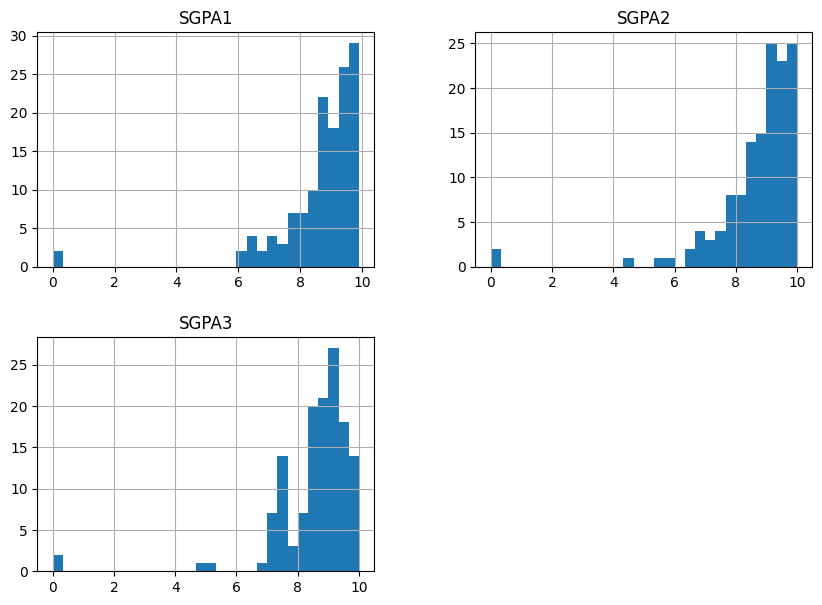

In [16]:
data[numerical_features].hist(bins=30, figsize=(10, 7))

In [17]:
X = data[['SGPA1', 'SGPA2', 'SGPA3']] 
y = data['SGPA4']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.3946467507332857
Mean Squared Error (MSE): 0.22288816240006917
Root Mean Squared Error (RMSE): 0.4721103286309983
R-squared (R2): 0.9276346245468459


In [21]:
import pickle
with open('sgpa_cgpa_model.pkl', 'wb') as file:
    pickle.dump(model, file)